# Vertebra Segmentation


Yazı
---

**Proje Künyesi:**

1-Emre Özmen
2-Hazal İzol Özmen
3-Serdar Yüksel
4-Alican Barış
5-Ozan Beytemur



*italicized text*## **1. Installation** *italicized text*

In [1]:
#@title INSTALLATION PACK1

# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0

--2022-12-17 05:25:06--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430460776 (411M) [application/x-deb]
Saving to: ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb’

libcudnn8_8.1.0.77- 100%[===================>] 410.52M   204MB/s    in 2.0s    

2022-12-17 05:25:09 (204 MB/s) - ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb’ saved [430460776/430460776]

dpkg: warning: downgrading libcudnn8 from 8.1.1.33-1+cuda11.2 to 8.1.0.77-1+cuda11.2
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+cuda11.2) over (8.1.1.33-1+cuda11.2) ...
Setting up libcudnn8 (8.1.0.77-1+c

In [1]:
#@title MOUNT GDRIVE


from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@title COPY MODEL
import os

src_path = '/content/drive/MyDrive/model' #@param {type: 'string'}
assert os.path.exists(src_path), f"Source '{src_path}' doesn't exist!"

target_path = '/content/maskrcnn_colab' #@param {type: 'string'}
os.makedirs(target_path, exist_ok=True)
assert os.path.exists(target_path), f"Target '{target_path}' doesn't exist!"

target_path = os.path.join(target_path, os.path.basename(src_path))
print(f'Copying from "{src_path}" to "{target_path}"...')
os.makedirs(target_path, exist_ok=True)
!cp -rf "$src_path"/* "$target_path"  # also work when source is a shortcut

Copying from "/content/drive/MyDrive/model" to "/content/maskrcnn_colab/model"...


In [3]:
#@title INSTALLATION PACKw


!wget https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
!unzip maskrcnn_colab_demo_commit_17.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline

--2022-12-17 05:28:23--  https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
Resolving pysource.com (pysource.com)... 172.67.180.33, 104.21.67.193, 2606:4700:3031::6815:43c1, ...
Connecting to pysource.com (pysource.com)|172.67.180.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59340 (58K) [application/zip]
Saving to: ‘maskrcnn_colab_demo_commit_17.zip’

maskrcnn_colab_demo 100%[===================>]  57.95K  --.-KB/s    in 0.01s   

2022-12-17 05:28:23 (5.06 MB/s) - ‘maskrcnn_colab_demo_commit_17.zip’ saved [59340/59340]

Archive:  maskrcnn_colab_demo_commit_17.zip
   creating: maskrcnn_colab/mrcnn_demo/
  inflating: maskrcnn_colab/mrcnn_demo/config.py  
  inflating: maskrcnn_colab/mrcnn_demo/model.py  
  inflating: maskrcnn_colab/mrcnn_demo/m_rcnn.py  
  inflating: maskrcnn_colab/mrcnn_demo/parallel_model.py  
  inflating: maskrcnn_colab/mrcnn_demo/utils.py  
  inflating: maskrcnn_colab/mrcnn_demo/visualize.py  
VERS 0.4 - updated 04/08/20

/content/maskrcnn_colab/mrcnn_demo/model.py:2378: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if os.name is 'nt':


... done downloading pretrained model!


In [ ]:
#@title NVIDIA

!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
#@title CONVERT JPEG TO PNG


# Set the directory where the JPEG and JPG images are located
directory = "/content/drive/MyDrive/Archive"

# Set the directory where the PNG images should be saved
png_directory = "/content/drive/MyDrive/Archive_png"

# Make sure the png directory exists
if not os.path.exists(png_directory):
  os.makedirs(png_directory)

# Loop through all the files in the directory
for filename in os.listdir(directory):
  # Check if the file is a JPEG or JPG file
  if filename.endswith(".jpeg") or filename.endswith(".jpg"):
    # Open the image file
    image = Image.open(os.path.join(directory, filename))
    max_size = (1000, 1000)
    image.thumbnail(max_size)
   
    # Save the image as a PNG file in the png directory
    image.save(os.path.join(png_directory, filename.replace(".jpeg", ".png").replace(".jpg", ".png")))

In [254]:
#@title IMPORT LIBRARIES

import matplotlib.pyplot as plt
from skimage.filters import threshold_niblack
from skimage.util import img_as_ubyte
from google.colab.patches import cv2,cv2_imshow
import os
from PIL import Image
import sys

from math import atan, pi, degrees
import math

import seaborn as sns
from numpy import polyfit
import numpy as np
import numpy
numpy.set_printoptions(threshold=sys.maxsize)


In [6]:
#@title MODELİ YÜKLE

test_model, inference_config = load_inference_model(1, "/content/maskrcnn_colab/mask_rcnn_coco.h5")

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Instructions for updating:
Use fn_output_signature instead


Loading weights from  /content/maskrcnn_colab/mask_rcnn_coco.h5


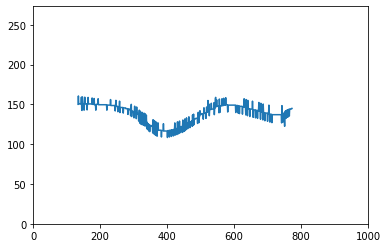

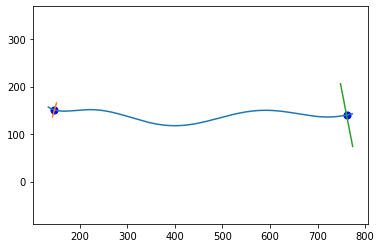

Text(50, 600, '23')

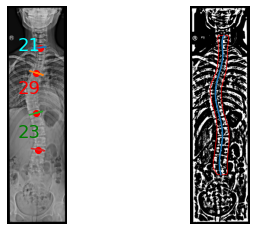

In [262]:
img = cv2.imread('/content/drive/MyDrive/Archive_png/01-July-2019-6.png')
# Check if the image is actually loaded


# Iterate through the files




#******************************************************************************
threshold = threshold_niblack(img, window_size=39, k=-0.6)
binary_image = img > threshold
binary_image = img_as_ubyte(binary_image)
#****************************************************************************** 
r = test_model.detect([binary_image])[0]
#******************************************************************************
colors=random_colors(2)
#******************************************************************************
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(binary_image, [cnt], True, colors[1], 2)
#******************************************************************************    
# Flatten the contours list into a single NumPy array
flattened_contours = np.concatenate(contours)

# Get a set of unique y values from the flattened contours array
y_values = (set(flattened_contours[:, 1]))

midpoints = []

# Iterate over the y values
for y in y_values:
  # Use the isin() function to filter the contours array to only include coordinates with the current y value
  x_values = flattened_contours[np.isin(flattened_contours[:, 1], y), 0]
  
  # Compute the average of the x values
  x_average = np.mean(x_values)
  
  # Append the x_average and y values to the midpoints list
  midpoints.append([(x_average), (y)])

#******************************************************************************
flipped_midpoints = [(y, x) for x, y in midpoints]

# Extract the x and y coordinates from the flipped_midpoints list
x = [coord[0] for coord in flipped_midpoints]
y = [coord[1] for coord in flipped_midpoints]

# Create a new figure with a white background
fig = plt.figure(facecolor='w')

# Use the plot() function to plot the x and y coordinates on the white background
plt.plot(x, y)

# Set the limits of the x and y axes to the same range
plt.xlim(0, binary_image.shape[0])
plt.ylim(0, binary_image.shape[1])

# Save the plot to a file
plt.savefig('flipped_midpoints_same_scale.png')
#******************************************************************************

coords = sorted(flipped_midpoints, key=lambda x: x[0])
fig, ax = plt.subplots()


subset = coords[int(len(coords)*0):int(len(coords)*1)]
x = [x[0] for x in subset]
y = [x[1] for x in subset]

coefficients = np.polyfit(x, y, 7)

# Create a range of values for the x-axis
x_values = np.linspace(min(x), max(x), 500)

# Use the coefficients to calculate the y-values
y_values = np.polyval(coefficients, x_values)
plt.plot(x_values, y_values)

# Compute the coefficients of the derivative of the polynomial
derivative_coefficients = np.polyder(coefficients)

# Compute the coefficients of the second derivative of the polynomial
second_derivative_coefficients = np.polyder(derivative_coefficients)

# Calculate the second derivative of the polynomial at each point on the x-axis
second_derivative_values = np.polyval(second_derivative_coefficients, x_values)

# Use the sign function to find the sign of the second derivative at each point
second_derivative_signs = np.sign(second_derivative_values)

# Find the points where the sign of the second derivative changes
inflection_points = np.where(np.diff(second_derivative_signs))[0]
inverse_inf_points = []

# Iterate over the inflection points
for inflection_point in inflection_points:
    # Get the x and y values at the current index
    x_inflection = x_values[inflection_point]
    y_inflection = y_values[inflection_point]
    # Append the coordinates to the list
    inverse_inf_points.append((y_inflection, x_inflection))

# Find the minimum and maximum x-values
#x_min = min(x)
#x_max = max(x)
x_min = min([x_value for i, x_value in enumerate(x) if 0.02 <= i/len(x) <= 0.98])
x_max = max([x_value for i, x_value in enumerate(x) if 0.02 <= i/len(x) <= 0.98])
# Find the y-values and slopes of the tangents at the minimum and maximum x-values
y_min = np.polyval(coefficients, x_min)
slope_min = np.polyval(derivative_coefficients, x_min)
slope_min_inv=-1/slope_min
intercept = y_min - slope_min_inv * x_min
x_line = np.linspace(min(x), max(x), 2)
y_line = intercept + slope_min_inv * x_line

# Calculate the length of the line in pixels
line_length = 150
x1 = x_min
y1 = y_min
x2 = x1 +   (x_line[1] - x_line[0]) / line_length
y2 = y1 +  (y_line[1] - y_line[0]) / line_length
x3 = x1 -  (x_line[1] - x_line[0]) / line_length
y3 = y1 -  (y_line[1] - y_line[0]) / line_length
plt.plot([x3, x2], [y3, y2])






y_max = np.polyval(coefficients, x_max)
slope_max = np.polyval(derivative_coefficients, x_max)
slope_max_inv=-1/slope_max
intercept = y_max - slope_max_inv * x_max
x_line = np.linspace(min(x), max(x), 2)
y_line = intercept + slope_max_inv * x_line

# Calculate the length of the line in pixels
line_length = 50
x1 = x_max
y1 = y_max
x2 = x1 +   (x_line[1] - x_line[0]) / line_length
y2 = y1 +  (y_line[1] - y_line[0]) / line_length
x3 = x1 -  (x_line[1] - x_line[0]) / line_length
y3 = y1 -  (y_line[1] - y_line[0]) / line_length
plt.plot([x3, x2], [y3, y2])



# Plot the minimum and maximum x-values as blue dots
plt.scatter([x_min, x_max], [y_min, y_max], c='blue', s=50)

# Find the coordinates of the points at which the perpendiculars intersect the x-axis





 
# Mark the inflection points on the plot with a red dot
#DRAW TANGENT TO POLYNOMIAL
# Loop over the filtered inflection points
slopes=[]
for inflection_point in inflection_points:
    x_inflection = x_values[inflection_point]
    y_inflection = y_values[inflection_point]
    derivative_value = np.polyval(derivative_coefficients, x_inflection)
    slopes.append(-1*derivative_value)
   


inf_point_with_slopes=[]

for (x, y), m in zip(inverse_inf_points, slopes):
  inf_point_with_slopes.append((x, y, m))


 #INVERTED PART   
# ****************************************************************

plt.xlim(0, 450)
plt.ylim(0,706)
ax.axis('equal')
# Show the plot

plt.show()
# ****************************************************************

figres, (ax1, ax2) = plt.subplots(1, 2)
height, width = binary_image.shape[:2]
image_width = width
image_height = height
ax1.set_xlim(image_width)
ax1.set_ylim(image_height)
ax1.set_axis_off()
ax2.set_axis_off()

ax1.invert_xaxis()
ax1.imshow(img)
top_tuple=[(x_min,y_min,slope_min)]
bottom_tuple=[(x_max,y_max,slope_max)]
#PLOT LINES FUNCTION

def plot_lines(points):
  

  for x, y, m in points:
    topxvalues = []
    topyvalues = []

    topx = x
    topy = y
    topxvalues.append(topx)
    topyvalues.append(topy)

    topx2 = topx + 30
    topy2 = topy + m * 30
    topxvalues.append(topx2)
    topyvalues.append(topy2)

    topx3 = topx - 30
    topy3 = topy - m * 30
    topxvalues.append(topx3)
    topyvalues.append(topy3)

    ax1.scatter(x, y, color='red')
    ax1.plot(topxvalues, topyvalues)

#************************************





#INFLECTION POINTS



final_tuple=inf_point_with_slopes


if len(inflection_points) ==1:
 
    final_tuple.insert(0, top_tuple[0])
    final_tuple[1:1] = inf_point_with_slopes
    final_tuple.insert(2, bottom_tuple[0])

if len(inflection_points) ==2:
    final_tuple.insert(0, top_tuple[0])
    final_tuple[1:1] = inf_point_with_slopes
    final_tuple.append(bottom_tuple)

if len(inflection_points) ==3:
    topx=y_min
    topy=x_min
    bottomx=y_max
    bottomy=x_max

    # Extract the x and y coordinates
    x = [inverse_inf_points[0][0], topx]
    y = [inverse_inf_points[0][1], topy]
    
    dx = topx - inverse_inf_points[0][0]
    dy = topy - inverse_inf_points[0][1]

# Calculate the length of the line segment using the distance formula
    length = math.sqrt(dx**2 + dy**2)
    

    x = [inverse_inf_points[2][0], bottomx]
    y = [inverse_inf_points[2][1], bottomy]
    
    dx = bottomx - inverse_inf_points[2][0]
    dy = bottomy - inverse_inf_points[2][1]
    
# Calculate the length of the line segment using the distance formula
    length2 = math.sqrt(dx**2 + dy**2)
    if length>length2: # cervical wins
      pickedx=topx
      pickedy=topy
      pickedslope=-slope_min
      tuple_winner=[pickedx,pickedy,pickedslope]
      final_tuple.insert(0, tuple_winner[0])

      
     
    else: #lumbar wins
      pickedx=bottomx
      pickedy=bottomy
      pickedslope=-slope_max
      tuple_winner=[pickedx,pickedy,pickedslope]
      final_tuple.append(tuple_winner)
   


plot_lines(final_tuple)   
 


# Display the second image in the second subplot
ax2.plot(y_values,x_values)
ax2.imshow(binary_image)
#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


#BEFORE GOING INTO CALCULATION, CREATE THE FINAL LIST WITH COORDINATES AND SLOPES


#calculate angles
cervical_angle=int(math.degrees(math.atan2(final_tuple[1][2] - final_tuple[0][2], 1)))
thoracic_angle = int(math.degrees(math.atan2(final_tuple[2][2] - final_tuple[1][2], 1)))
# Calculate the lumbar angle
lumbar_angle = int(math.degrees(math.atan2(final_tuple[3][2] - final_tuple[2][2], 1)))
cervical_angle = abs(cervical_angle)
thoracic_angle = abs(thoracic_angle)
lumbar_angle = abs(lumbar_angle)

# If the angle is greater than 90 degrees, subtract it from 180 to get the acute angle
if cervical_angle > 90:
    cervical_angle = 180 - cervical_angle
if thoracic_angle > 90:
    thoracic_angle = 180 - thoracic_angle
if lumbar_angle > 90:
    lumbar_angle = 180 - lumbar_angle

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
# Calculate label coordinates.
# Get the width and height of the image
height, width = binary_image.shape[:2]

# Top label
ax1.text(50, 200, int(cervical_angle), fontsize=18,color='cyan')
# Mid-label
ax1.text(50,400, int(thoracic_angle), fontsize=18,color='red')
# Bottom-label
ax1.text(50,600, int(lumbar_angle), fontsize=18,color='green')
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# Save the width and height to variables

# ****************************************************************



In [ ]:
#LAZIM OLURSA
